## _Problem Statement_

## According to Federal Trade Commission Act(FTC Act),Section 5(a), unfair or deceptive acts are prohibited. Apart from having stringent guidelines for what qualifies as Unfair or Deceptive Acts or practices(enlisted in Section 5(a), of FTC Act), Board of Governors of the Federal Reserve System and the Federal Deposit Insurance  Corporation, have narrowed down the guidance on managing risks relating to UDAP and general guidance on measures that state-chartered banks can take to avoid engaging in such acts or practices, including best practices.

## Monitoring Unfair or deceptive acts, is prime criteria on which transparency of bank functioning would be decided. Apart from that, it also exposes the pit fall or financial traps in which a mammoth institution of bank, can entrap customer, by shielding key information or partially proving information regarding a product or misinform a consumer or entrap customers by advertising a product with malicious information. Such acts, not only unfair and unethical on the part of the bank, but more importantly leads to innocent , hard working, citizens getting caught in web of unforeseen financial burden, without any mistake of there own.

## Such practices will result in fraudulent profits to the banks, at the expense of customer caught unguarded in a financial trap or worse, it might lead to frivolous legal proceedings, which will come at the expense of the hard earned money of a average citizen.

## However, even after having a stringent guidelines on avoiding unfair practices, incident of banks indulging in such acts do take place. And its of great importance to keep a check on banks, to monitor the concerns raised by customers.

## Based on the complaint raised by the consumer and weighing it against the guidelines established under FTC Act, Section 5(a), a call has to be take to check weather it exposes a loop hole or intentional fraud act, carried by the bank or any third party involved.

## A complaint raised by a consumer is not just a possible act of violation,on the part of bank, but its also an opportunity for the bank to check if a loop hole of their's has been exposed, which went unchecked till now. Responsibility lies on the bank, on what kind of corrective measures it takes to repair loop hole and what course correction are taken by the bank to not repeat the same in future. Effectiveness with which a bank acts on the complaint will also show its commitment towards a fair and transparent transactions, going ahead.

## In response to tackle the problem of monitoring the grievance raised by consumers, a text mining model will be deployed to analyze the Grievance description and categorize it as a Unfair and deceptive practices or otherwise.

## Further more, to keep a check on the bank, all the grievances received by the bank, will be monitored and a analytical and modeling framework, will be deployed to predict the compliance rating of the bank.



## Datasets involved :
 - GrievancesData_Train.csv
 - Train.csv

## "GrievancesData_Train.csv" Dataset descption :

 - This dataset has enlisting of grievances raised across all the banks and states, with corresponding description, date on which the grievances were raised and corresponding date of resolution. 

- Dataset also include the line of business for which the grievances were raised and comments for the resolution provided.


- Column for "Disputed", has the classification of weather grievance raised falls under the category of "Unfair and Deceptive practices" described under Federal Trade Commission Act Section 5: Unfair or Deceptive Acts or Practices
 


## "Train.csv" Dataset Description :
- Has all the unique bank ID's and there respective "BankGrade". This grading provides higher level understanding of how well a bank follows the norms of Federal Trade Commission Act Section 5: Unfair or Deceptive Acts or Practices

## Commencing building of analytical and modelling framework

## _Importing Required libraries_

In [91]:
# import libraries
import os 
import re  
import pandas as pd


In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.offline as pyoff

from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

%matplotlib inline

In [93]:
# use nltk libraries for text preprocessing
import nltk

In [94]:
from textblob import TextBlob

In [95]:
init_notebook_mode(connected=True)

## _Setting the working Directory_

In [96]:
# set directory
os.getcwd()

'C:\\Users\\Sowmya\\Downloads\\PHD\\Model_Practice'

In [97]:
os.chdir('C:\\Users\\Sowmya\\Downloads\\PHD\\Model_Practice')

## _Importing GrievancesData_Train as GD_Train

In [98]:
GD_train = pd.read_csv('GrievancesData_Train.csv')

## Checking first 5 rows of the GD_Train Dataframe

In [99]:
GD_train.head()

GrievanceID    BankID    State DateOfGrievance  \
0   GID512411  Bank5279  State31      2016-01-19   
1   GID512412  Bank5287  State26      2016-01-19   
2   GID512413  Bank5286  State14      2016-01-19   
3   GID512415  Bank5279  State53      2016-01-19   
4   GID512417  Bank5286  State37      2016-01-19   

                         Grievance_Category  \
0              Settlement process and costs   
1  Application, originator, mortgage broker   
2                          Billing disputes   
3  Loan servicing, payments, escrow account   
4  Loan modification,collection,foreclosure   

                                GrievanceDescription LineOfBusiness  \
0   Bank5279 Research dpt. \nXXXX XXXX XXXX XXXX,...       Mortgage   
1   I had a mortgage with from XXXX of XXXX to XX...       Mortgage   
2   In XXXX XXXX, I was given a {$1100.00} credit...    Credit card   
3   Our Mortgage was sold to Bank5279 in XXXX of ...       Mortgage   
4   We started dealing with Citi Mortgage back in...       Mortgage   

            ResolutionComments Disputed DateOfResolution  
0      Closed with explanation       No       2016-01-30  
1      Closed with explanation      Yes       2016-02-10  
2  Closed with monetary relief      Yes       2016-02-10  
3      Closed with explanation       No       2016-01-30  
4      Closed with explanation       No       2016-01-30

## _Getting the list of all the columns_

In [100]:
GD_train.columns

Index(['GrievanceID', 'BankID', 'State', 'DateOfGrievance',
       'Grievance_Category', 'GrievanceDescription', 'LineOfBusiness',
       'ResolutionComments', 'Disputed', 'DateOfResolution'],
      dtype='object')

## _Checking the data types of all the columns_

In [101]:
GD_train.dtypes

GrievanceID             object
BankID                  object
State                   object
DateOfGrievance         object
Grievance_Category      object
GrievanceDescription    object
LineOfBusiness          object
ResolutionComments      object
Disputed                object
DateOfResolution        object
dtype: object

## _Getting the share of the entire Dataframe_

In [102]:
GD_train.shape

(53680, 10)

## _Checking for null values in the dataframe_

In [103]:
GD_train.isnull().sum()

GrievanceID               0
BankID                    0
State                   121
DateOfGrievance           0
Grievance_Category        0
GrievanceDescription      0
LineOfBusiness            0
ResolutionComments        0
Disputed                  0
DateOfResolution          0
dtype: int64

## _The total number of "NA" values is 121 out of 553680_
 
 ## _As the the percentage of "NA" is less than 5% compared to overall number of rows. I am dropping those from further analysis_

In [104]:
GD_train.dropna(inplace=True)

## _Rechecking for null values_

In [105]:
GD_train.isnull().sum()

GrievanceID             0
BankID                  0
State                   0
DateOfGrievance         0
Grievance_Category      0
GrievanceDescription    0
LineOfBusiness          0
ResolutionComments      0
Disputed                0
DateOfResolution        0
dtype: int64

## _Checking the shape of the updated dataframe_

In [106]:
GD_train.shape

(53559, 10)

## _Observation - # of rows have come down from 53680 to 53559_





## _Generating Summary of descriptive statistics for all the colums_

In [107]:
GD_train.describe(include='all')

GrievanceID    BankID   State DateOfGrievance  \
count        53559     53559   53559           53559   
unique       53559        86      59            1222   
top      GID466143  Bank5286  State9      2014-01-19   
freq             1      5602    8110             172   

                              Grievance_Category  \
count                                      53559   
unique                                        67   
top     Loan servicing, payments, escrow account   
freq                                        8448   

                                     GrievanceDescription LineOfBusiness  \
count                                               53559          53559   
unique                                              46551              4   
top      I was shocked when I reviewed my credit repor...    Credit card   
freq                                                    8          21570   

             ResolutionComments Disputed DateOfResolution  
count                     53559    53559            53559  
unique                        4        2             1248  
top     Closed with explanation       No       2013-10-01  
freq                      41473    41795              142

## _Rechecking first few rows of data from the data frame_

In [108]:
GD_train.head()

GrievanceID    BankID    State DateOfGrievance  \
0   GID512411  Bank5279  State31      2016-01-19   
1   GID512412  Bank5287  State26      2016-01-19   
2   GID512413  Bank5286  State14      2016-01-19   
3   GID512415  Bank5279  State53      2016-01-19   
4   GID512417  Bank5286  State37      2016-01-19   

                         Grievance_Category  \
0              Settlement process and costs   
1  Application, originator, mortgage broker   
2                          Billing disputes   
3  Loan servicing, payments, escrow account   
4  Loan modification,collection,foreclosure   

                                GrievanceDescription LineOfBusiness  \
0   Bank5279 Research dpt. \nXXXX XXXX XXXX XXXX,...       Mortgage   
1   I had a mortgage with from XXXX of XXXX to XX...       Mortgage   
2   In XXXX XXXX, I was given a {$1100.00} credit...    Credit card   
3   Our Mortgage was sold to Bank5279 in XXXX of ...       Mortgage   
4   We started dealing with Citi Mortgage back in...       Mortgage   

            ResolutionComments Disputed DateOfResolution  
0      Closed with explanation       No       2016-01-30  
1      Closed with explanation      Yes       2016-02-10  
2  Closed with monetary relief      Yes       2016-02-10  
3      Closed with explanation       No       2016-01-30  
4      Closed with explanation       No       2016-01-30

## _The column for "GrievanceDescription", is plain text, it wont be contributing for this model building._
## _Note :"GrievanceDescription" will utilized Text mining section_


## _Creating a new Data frame,with the exception of "GriecvanceDescription"_

In [109]:
GD_MM_DF = GD_train[["GrievanceID","BankID","State","DateOfGrievance","Grievance_Category","LineOfBusiness","ResolutionComments","Disputed","DateOfResolution"]]

## _Rechecking Dataframe dimensions for cross validation_

In [110]:
GD_MM_DF.shape

(53559, 9)

## _Observation - Number of colums has come down from 10 to 9 after excluding "GriecvanceDescription"_

## _Rechecking the new data frame for the columns_

In [111]:
GD_MM_DF.columns

Index(['GrievanceID', 'BankID', 'State', 'DateOfGrievance',
       'Grievance_Category', 'LineOfBusiness', 'ResolutionComments',
       'Disputed', 'DateOfResolution'],
      dtype='object')

## _Checking for corresponding datatypes for all the columns_

In [112]:
GD_MM_DF.dtypes

GrievanceID           object
BankID                object
State                 object
DateOfGrievance       object
Grievance_Category    object
LineOfBusiness        object
ResolutionComments    object
Disputed              object
DateOfResolution      object
dtype: object

In [113]:
GD_MM_DF.describe(include='all')

GrievanceID    BankID   State DateOfGrievance  \
count        53559     53559   53559           53559   
unique       53559        86      59            1222   
top      GID466143  Bank5286  State9      2014-01-19   
freq             1      5602    8110             172   

                              Grievance_Category LineOfBusiness  \
count                                      53559          53559   
unique                                        67              4   
top     Loan servicing, payments, escrow account    Credit card   
freq                                        8448          21570   

             ResolutionComments Disputed DateOfResolution  
count                     53559    53559            53559  
unique                        4        2             1248  
top     Closed with explanation       No       2013-10-01  
freq                      41473    41795              142

## _Rechecking the first few values in all columns_

In [114]:
GD_MM_DF.head()

GrievanceID    BankID    State DateOfGrievance  \
0   GID512411  Bank5279  State31      2016-01-19   
1   GID512412  Bank5287  State26      2016-01-19   
2   GID512413  Bank5286  State14      2016-01-19   
3   GID512415  Bank5279  State53      2016-01-19   
4   GID512417  Bank5286  State37      2016-01-19   

                         Grievance_Category LineOfBusiness  \
0              Settlement process and costs       Mortgage   
1  Application, originator, mortgage broker       Mortgage   
2                          Billing disputes    Credit card   
3  Loan servicing, payments, escrow account       Mortgage   
4  Loan modification,collection,foreclosure       Mortgage   

            ResolutionComments Disputed DateOfResolution  
0      Closed with explanation       No       2016-01-30  
1      Closed with explanation      Yes       2016-02-10  
2  Closed with monetary relief      Yes       2016-02-10  
3      Closed with explanation       No       2016-01-30  
4      Closed with explanation       No       2016-01-30

## _Noticing from columns for "DateOfGrievance" and DateOfResolution", even though there datatype is "Object", the content of the column are date type in format "YYYY-MM-DD"_

## _Going ahead with updating the data types as date in the format "YYYY-MM-DD",for columns "DateOfGrievance" and "DateOfResolution"_

In [115]:
GD_MM_DF['DateOfGrievance'] = GD_MM_DF.DateOfGrievance.astype('datetime64[ns]')

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [116]:
GD_MM_DF['DateOfResolution'] = GD_MM_DF.DateOfResolution.astype('datetime64[ns]')

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## _Checking for updated data types_

In [117]:
GD_MM_DF.dtypes

GrievanceID                   object
BankID                        object
State                         object
DateOfGrievance       datetime64[ns]
Grievance_Category            object
LineOfBusiness                object
ResolutionComments            object
Disputed                      object
DateOfResolution      datetime64[ns]
dtype: object

## _Taking the difference of "DateOfGrievance" and "DateOfResolution", to get the number of days for the Grievance resolution and putting into a new colum named "Days"_

In [118]:
GD_MM_DF['Days'] = GD_MM_DF.apply(lambda row: row.DateOfResolution - row.DateOfGrievance, axis=1)

## _Checking the updated columns_

In [119]:
GD_MM_DF.head()

GrievanceID    BankID    State DateOfGrievance  \
0   GID512411  Bank5279  State31      2016-01-19   
1   GID512412  Bank5287  State26      2016-01-19   
2   GID512413  Bank5286  State14      2016-01-19   
3   GID512415  Bank5279  State53      2016-01-19   
4   GID512417  Bank5286  State37      2016-01-19   

                         Grievance_Category LineOfBusiness  \
0              Settlement process and costs       Mortgage   
1  Application, originator, mortgage broker       Mortgage   
2                          Billing disputes    Credit card   
3  Loan servicing, payments, escrow account       Mortgage   
4  Loan modification,collection,foreclosure       Mortgage   

            ResolutionComments Disputed DateOfResolution    Days  
0      Closed with explanation       No       2016-01-30 11 days  
1      Closed with explanation      Yes       2016-02-10 22 days  
2  Closed with monetary relief      Yes       2016-02-10 22 days  
3      Closed with explanation       No       2016-01-30 11 days  
4      Closed with explanation       No       2016-01-30 11 days

## _Dropping the column for 'DateOfGrievance' and 'DateOfResolution'_

In [120]:
GD_MM_DF = GD_MM_DF.drop(['DateOfGrievance','DateOfResolution'],axis=1)

## _Checking the updated dataframe_

In [121]:
GD_MM_DF.head()

GrievanceID    BankID    State                        Grievance_Category  \
0   GID512411  Bank5279  State31              Settlement process and costs   
1   GID512412  Bank5287  State26  Application, originator, mortgage broker   
2   GID512413  Bank5286  State14                          Billing disputes   
3   GID512415  Bank5279  State53  Loan servicing, payments, escrow account   
4   GID512417  Bank5286  State37  Loan modification,collection,foreclosure   

  LineOfBusiness           ResolutionComments Disputed    Days  
0       Mortgage      Closed with explanation       No 11 days  
1       Mortgage      Closed with explanation      Yes 22 days  
2    Credit card  Closed with monetary relief      Yes 22 days  
3       Mortgage      Closed with explanation       No 11 days  
4       Mortgage      Closed with explanation       No 11 days

## _Checking Datatypes for updated dataframe_

In [122]:
GD_MM_DF.dtypes

GrievanceID                    object
BankID                         object
State                          object
Grievance_Category             object
LineOfBusiness                 object
ResolutionComments             object
Disputed                       object
Days                  timedelta64[ns]
dtype: object

## _Changing the datatype of "Days" column to integer_

In [123]:
GD_MM_DF['Days'] = GD_MM_DF['Days'].dt.days

## _Cross Checking the datatype of the "Days" column_

In [124]:
GD_MM_DF['Days'].dtype

dtype('int64')

## _Updated dataframe_

In [125]:
GD_MM_DF.dtypes

GrievanceID           object
BankID                object
State                 object
Grievance_Category    object
LineOfBusiness        object
ResolutionComments    object
Disputed              object
Days                   int64
dtype: object

In [126]:
GD_MM_DF.columns

Index(['GrievanceID', 'BankID', 'State', 'Grievance_Category',
       'LineOfBusiness', 'ResolutionComments', 'Disputed', 'Days'],
      dtype='object')

## _On the basis of the main dataframe analysis this far, creating a temp - "GD_MM_DF_temp" data drame, with selected few columns, to validate if they are catagorical columns or otherwise._

## _"GrievanceID" is a unique for ID for each row and "Days" is a integer value. So,  excluding the columns for "GrievanceID" and "Days"._

In [127]:
GD_MM_DF_temp = GD_MM_DF[['BankID', 'State', 'Grievance_Category',
       'LineOfBusiness', 'ResolutionComments', 'Disputed']]

In [128]:
GD_MM_DF_temp.describe()

BankID   State                        Grievance_Category  \
count      53559   53559                                     53559   
unique        86      59                                        67   
top     Bank5286  State9  Loan servicing, payments, escrow account   
freq        5602    8110                                      8448   

       LineOfBusiness       ResolutionComments Disputed  
count           53559                    53559    53559  
unique              4                        4        2  
top       Credit card  Closed with explanation       No  
freq            21570                    41473    41795

## _Checking for number of unique values for selected columns_

In [129]:
for i in GD_MM_DF_temp.columns:
    print ("Number of unique values in {} column are {} \n The unique values are {}".format(i, len(GD_MM_DF_temp[i].unique()),GD_MM_DF_temp[i].unique()))
    print ("---------------------- \n")

Number of unique values in BankID column are 86 
 The unique values are ['Bank5279' 'Bank5287' 'Bank5286' 'Bank5237' 'Bank5257' 'Bank5397'
 'Bank5382' 'Bank5422' 'Bank5428' 'Bank5451' 'Bank5421' 'Bank5415'
 'Bank5245' 'Bank5440' 'Bank5254' 'Bank5425' 'Bank5251' 'Bank5426'
 'Bank5367' 'Bank5313' 'Bank5351' 'Bank5341' 'Bank5285' 'Bank5260'
 'Bank5453' 'Bank5256' 'Bank5277' 'Bank5249' 'Bank5309' 'Bank5454'
 'Bank5342' 'Bank5336' 'Bank5432' 'Bank5410' 'Bank5274' 'Bank5445'
 'Bank5242' 'Bank5308' 'Bank5455' 'Bank5418' 'Bank5386' 'Bank5340'
 'Bank5348' 'Bank5326' 'Bank5262' 'Bank5303' 'Bank5390' 'Bank5375'
 'Bank5423' 'Bank5414' 'Bank5380' 'Bank5436' 'Bank5261' 'Bank5265'
 'Bank5446' 'Bank5434' 'Bank5247' 'Bank5448' 'Bank5430' 'Bank5346'
 'Bank5350' 'Bank5328' 'Bank5234' 'Bank5324' 'Bank5459' 'Bank5449'
 'Bank5356' 'Bank5438' 'Bank5364' 'Bank5387' 'Bank5439' 'Bank5388'
 'Bank5383' 'Bank5338' 'Bank5408' 'Bank5298' 'Bank5405' 'Bank5270'
 'Bank5359' 'Bank5378' 'Bank5360' 'Bank5330' 'Bank5252' '

## Assumptions :
 - Going ahead all the columns except for "GrievanceID" and "Days" will be updated to "catagory" type.

## Updating all the columns from the temp dataframe "GD_MM_DF_temp" to "Catagory" type, in the main dataframe "GD_MM_DF"

In [130]:
GD_MM_DF['BankID'] = GD_MM_DF['BankID'].astype('category')
GD_MM_DF['State'] = GD_MM_DF['State'].astype('category')
GD_MM_DF['Grievance_Category'] = GD_MM_DF['Grievance_Category'].astype('category')
GD_MM_DF['LineOfBusiness'] = GD_MM_DF['LineOfBusiness'].astype('category')
GD_MM_DF['ResolutionComments'] = GD_MM_DF['ResolutionComments'].astype('category')
GD_MM_DF['Disputed'] = GD_MM_DF['Disputed'].astype('category')

## _Checking the dataframe for the updated data types._

In [131]:
GD_MM_DF.dtypes

GrievanceID             object
BankID                category
State                 category
Grievance_Category    category
LineOfBusiness        category
ResolutionComments    category
Disputed              category
Days                     int64
dtype: object

## Exploratory Data analysis for the main data frame "GD_MM_DF"
 - Saving layout for bar graph

In [132]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
#         range=[0,100],
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar

## Defining a function to plot the bar charts

In [133]:
def plot_bar(col_name):
    # create a table with value counts
    temp = GD_MM_DF[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index.astype(str), # x axis values
            y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)

## Checking for number of Disputed and non-Disputed grievances

In [134]:
GD_MM_DF.Disputed.value_counts()

No     41795
Yes    11764
Name: Disputed, dtype: int64

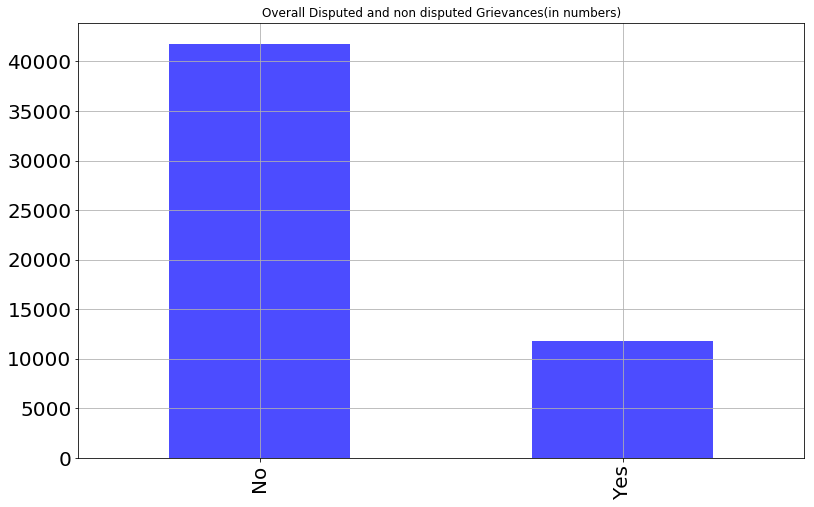

In [135]:
plt.figure()
GD_MM_DF.Disputed.value_counts().plot(kind='bar',
                                  figsize=(13,8),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=20)
plt.title('Overall Disputed and non disputed Grievances(in numbers)')
plt.grid()
plt.show()

- Observation : Number of Disputed grievances is more compared to number of non-disputed ones.

## Distribution of "Disputed" column in percentage

In [136]:
plot_bar('Disputed')

- Observation :The number of non disputed values covers nearly 79% of the total number of grievances raised.

## Number of Grievances under each Bank ID

In [137]:
GD_MM_DF.BankID.value_counts()

Bank5286    5602
Bank5257    5208
Bank5382    3878
Bank5285    3655
Bank5454    2223
Bank5237    2070
Bank5277    2032
Bank5256    1405
Bank5249    1340
Bank5421    1305
Bank5309    1282
Bank5428     960
Bank5440     958
Bank5418     892
Bank5260     827
Bank5397     823
Bank5308     771
Bank5279     744
Bank5274     735
Bank5378     693
Bank5242     676
Bank5338     640
Bank5359     611
Bank5348     599
Bank5425     559
Bank5436     558
Bank5261     554
Bank5426     505
Bank5451     464
Bank5390     436
            ... 
Bank5330     180
Bank5408     154
Bank5341     151
Bank5265     150
Bank5303     142
Bank5346     133
Bank5364     133
Bank5336     133
Bank5410     128
Bank5313     124
Bank5296     119
Bank5430     112
Bank5386     106
Bank5438     106
Bank5432     104
Bank5446     104
Bank5251     104
Bank5254      99
Bank5445      94
Bank5298      93
Bank5266      91
Bank5270      91
Bank5350      91
Bank5328      90
Bank5405      79
Bank5252      78
Bank5455      78
Bank5434      

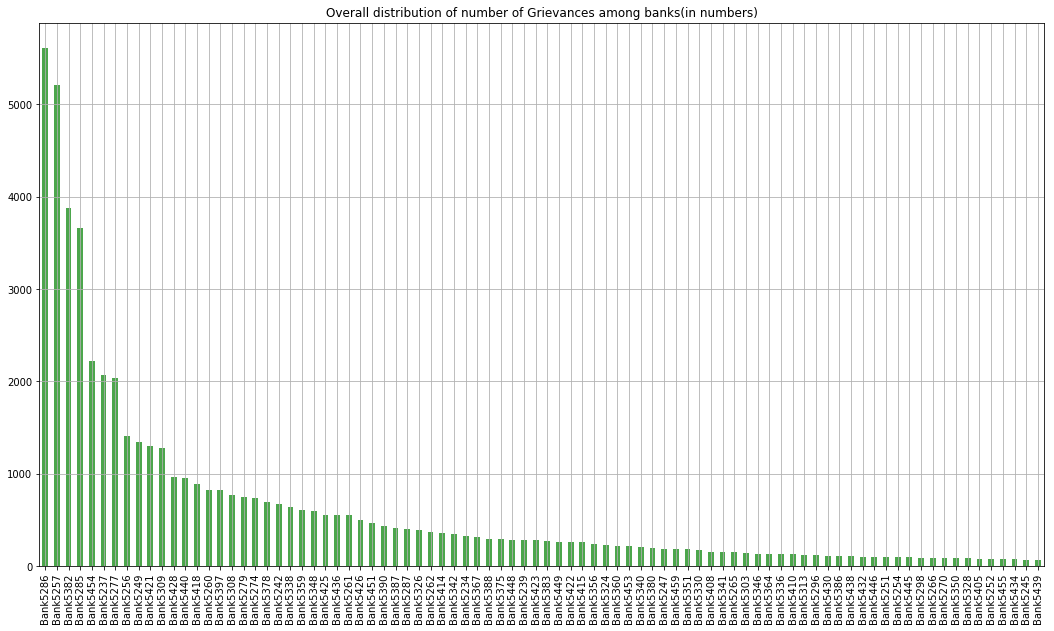

In [138]:
plt.figure()
GD_MM_DF.BankID.value_counts().plot(kind='bar',
                                  figsize=(18,10),
                                  color="green",
                                  alpha = 0.7,
                                  fontsize=10)
plt.title('Overall distribution of number of Grievances among banks(in numbers)')
plt.grid()
plt.show()

In [139]:
plot_bar('BankID')

- Observation : Among all 86 unique banks, top 10 banks in the list above, covers nearly 60% of the total number of grievacnes raised

## Exluding univarient analysis with respect to "State", as variation with respect to "Bank ID" is in focus

## Checking the distribution of grievance catagory, across all the the grievances raised

In [140]:
GD_MM_DF.Grievance_Category.value_counts()

Loan servicing, payments, escrow account                                            8448
Loan modification,collection,foreclosure                                            6461
Billing disputes                                                                    3634
Dealing with my lender or servicer                                                  3155
Managing the loan or lease                                                          2885
Other                                                                               2132
Identity theft / Fraud / Embezzlement                                               1946
Closing/Cancelling account                                                          1586
Application, originator, mortgage broker                                            1553
Trouble during payment process                                                      1342
Problems when you are unable to pay                                                 1170
Customer service / Cu

## Observation - 

## Intead of analysis of overall distribution of "Grievance_catagory", distribution of the same among each bank will be more informative.

## Ommiting "Grievance_catagory" from univarient analysis

## "Grivance_Catagory" will be futher explored , in the later part, with bivarient analysis, in the context of a bank ID.

## Distribution of Grievances received for different lines of business

In [141]:
GD_MM_DF.LineOfBusiness.value_counts()

Credit card      21570
Mortgage         21241
Consumer Loan     5509
Student loan      5239
Name: LineOfBusiness, dtype: int64

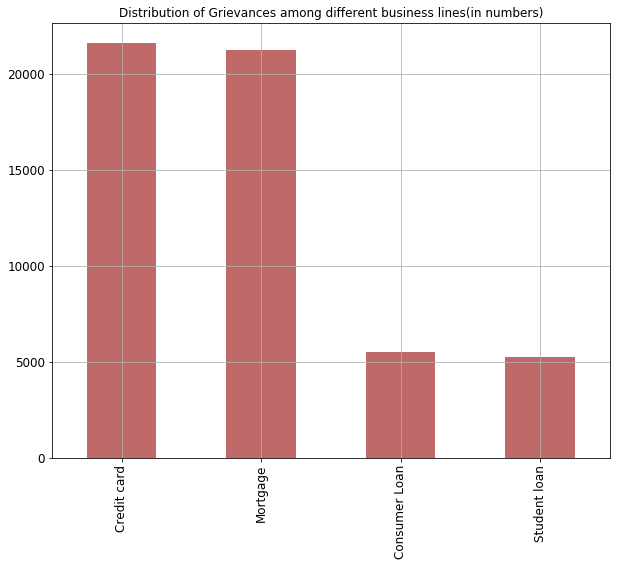

In [142]:
plt.figure()
GD_MM_DF.LineOfBusiness.value_counts().plot(kind='bar',
                                  figsize=(10,8),
                                  color="brown",
                                  alpha = 0.7,
                                  fontsize=12)
plt.title('Distribution of Grievances among different business lines(in numbers)')
plt.grid()
plt.show()

In [143]:
plot_bar('LineOfBusiness')

- Observation : "Credi card" and "Mortgage" business lines combined togather, receive nearly 80% of grievances.

## Distribution of Resolution comments among Grievances

In [144]:
GD_MM_DF.ResolutionComments.value_counts()

Closed with explanation            41473
Closed with monetary relief         6998
Closed with non-monetary relief     4500
Closed                               588
Name: ResolutionComments, dtype: int64

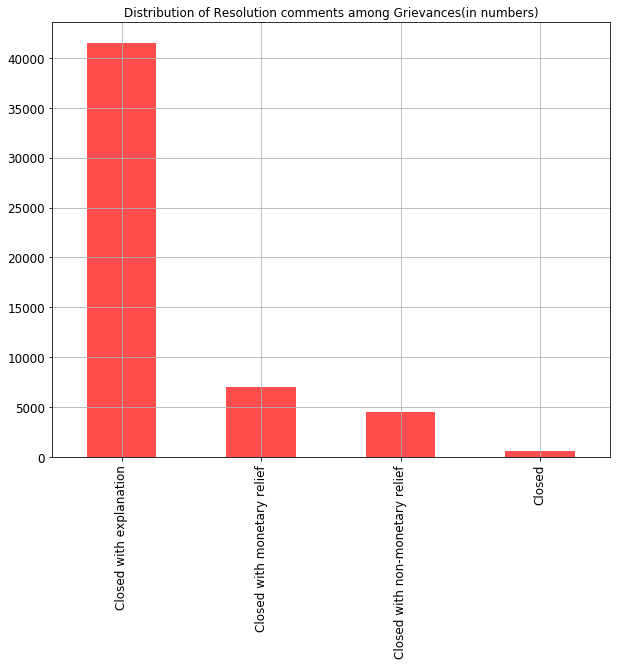

In [145]:
plt.figure()
GD_MM_DF.ResolutionComments.value_counts().plot(kind='bar',
                                  figsize=(10,8),
                                  color="red",
                                  alpha = 0.7,
                                  fontsize=12)
plt.title('Distribution of Resolution comments among Grievances(in numbers)')
plt.grid()
plt.show()

In [146]:
plot_bar('ResolutionComments')

- Observation : Nearly 78% of the grievances raised are closed with proper explanation

## Plotting the variations of number of days for Grievance resolution, across all the Grievnaces raised

In [147]:
trace0 = go.Scatter(
    x = GD_MM_DF.GrievanceID,
    y = GD_MM_DF.Days,
    mode = 'lines',
    name = 'lines'
)

data = [trace0]

iplot(data, filename='markers-mode')

In [148]:
GD_MM_DF.Days.describe()

count    53559.000000
mean        17.318154
std         11.240063
min          1.000000
25%         11.000000
50%         11.000000
75%         22.000000
max        629.000000
Name: Days, dtype: float64

-Observation : Cutting across all the banks, 75% of grievances are resolved within 22 days.

## Binning the Days column

In [149]:
list(range(0,GD_MM_DF.Days.max()+10,60))

[0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]

In [150]:
GD_MM_DF['Days_Bins'] = np.digitize(GD_MM_DF.Days,list(range(0,GD_MM_DF.Days.max()+10,60)),right=True)

In [151]:
GD_MM_DF['Days_Bins'].value_counts()

1     53282
2       255
3        12
4         5
11        2
10        1
6         1
5         1
Name: Days_Bins, dtype: int64

In [152]:
GD_MM_DF['Days_Bins'] = GD_MM_DF['Days_Bins'].replace(to_replace=[1,2,3,4,5,6,7,8,9,10,11],
                                                        value=['Bin1','Bin2','Bin3',
                                                                               'Bin4','Bin5','Bin6','Bin7','Bin8','Bin9','Bin10','Bin11'])

In [153]:
temp = GD_MM_DF['Days_Bins'].value_counts()
temp=temp.sort_index()

In [154]:
temp

Bin1     53282
Bin10        1
Bin11        2
Bin2       255
Bin3        12
Bin4         5
Bin5         1
Bin6         1
Name: Days_Bins, dtype: int64

## Distribution of days column bins

In [155]:
trace1 = go.Bar(x = temp.index,
               y = (temp.values.astype(float)/sum(temp.values))*100,
                text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
    # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
                textposition = 'auto',
               name = 'Days_Bins')
data = [trace1]
# these are used to define the layout options

layout = generate_layout_bar('Days_Bins')

fig = go.Figure(data=data, layout=layout)
iplot(fig)
print(list(range(0,GD_MM_DF.Days.max()+10,60)))

[0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]


- Observation : 99.48% of griveances fall under the first bin of 0 to 60 days

## Bivarient Analysis

## _Checking the variations in the "Disputed" column values in each bank("BankID")_

In [156]:
GM_Bank_Disputed = GD_MM_DF.groupby(['BankID','Disputed']).size().to_frame()
GM_Bank_Disputed=GM_Bank_Disputed.reset_index()
GM_Bank_Disputed.columns=['BankID','Disputed','Count']
GM_Bank_Disputed

BankID Disputed  Count
0    Bank5234       No    258
1    Bank5234      Yes     72
2    Bank5237       No   1745
3    Bank5237      Yes    325
4    Bank5239       No    230
5    Bank5239      Yes     53
6    Bank5242       No    553
7    Bank5242      Yes    123
8    Bank5245       No     61
9    Bank5245      Yes     11
10   Bank5247       No    145
11   Bank5247      Yes     46
12   Bank5249       No    877
13   Bank5249      Yes    463
14   Bank5251       No     80
15   Bank5251      Yes     24
16   Bank5252       No     58
17   Bank5252      Yes     20
18   Bank5254       No     72
19   Bank5254      Yes     27
20   Bank5256       No   1061
21   Bank5256      Yes    344
22   Bank5257       No   3923
23   Bank5257      Yes   1285
24   Bank5260       No    688
25   Bank5260      Yes    139
26   Bank5261       No    468
27   Bank5261      Yes     86
28   Bank5262       No    262
29   Bank5262      Yes    109
..        ...      ...    ...
142  Bank5432       No     87
143  Bank5432      Yes     17
144  Bank5434       No     64
145  Bank5434      Yes     12
146  Bank5436       No    443
147  Bank5436      Yes    115
148  Bank5438       No    100
149  Bank5438      Yes      6
150  Bank5439       No     55
151  Bank5439      Yes     16
152  Bank5440       No    701
153  Bank5440      Yes    257
154  Bank5445       No     78
155  Bank5445      Yes     16
156  Bank5446       No     76
157  Bank5446      Yes     28
158  Bank5448       No    217
159  Bank5448      Yes     70
160  Bank5449       No    217
161  Bank5449      Yes     47
162  Bank5451       No    356
163  Bank5451      Yes    108
164  Bank5453       No    161
165  Bank5453      Yes     52
166  Bank5454       No   1689
167  Bank5454      Yes    534
168  Bank5455       No     63
169  Bank5455      Yes     15
170  Bank5459       No    151
171  Bank5459      Yes     32

[172 rows x 3 columns]

## _Count of Disputed values for each bank_

In [157]:
trace1 = go.Bar(x = GM_Bank_Disputed.BankID[GM_Bank_Disputed.Disputed=='Yes'],
               y = GM_Bank_Disputed.Count[GM_Bank_Disputed.Disputed=='Yes'],
               name = 'Yes')
trace2 = go.Bar(x = GM_Bank_Disputed.BankID[GM_Bank_Disputed.Disputed=='No'],
               y = GM_Bank_Disputed.Count[GM_Bank_Disputed.Disputed=='No'],
               name = 'No')
data = [trace1,trace2]
layout = go.Layout(width = 1000,
                   height = 600,title = 'Disputed values(Yes/No) under each Bank')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

- Observation :

1) Number of disputed and undisputed(both yes and no) grievances, across all the banks are less than 500.

2) For all the banks, number of undisputed grievances is more in comparison of disputed grievances

3) Bank7257,Bank5285,Bank5286 and Bank5382 are the odds ones among all the banks, with number of both disputed and undisputed values going above 500.

4) Bank5257,Bank5285,Bank5286,Bank5382 and Bank5454 are the banks for which number of disputed grievances cross the mark of 500


## _Checking the variations in the "ResolutionComments" column values in each bank("BankID")_

In [158]:
GM_Bank_Res_Com = GD_MM_DF.groupby(['BankID','ResolutionComments']).size().to_frame()
GM_Bank_Res_Com=GM_Bank_Res_Com.reset_index()
GM_Bank_Res_Com.columns=['BankID','ResolutionComments','Count']
GM_Bank_Res_Com

BankID               ResolutionComments  Count
0    Bank5234          Closed with explanation    330
1    Bank5237          Closed with explanation   1631
2    Bank5237      Closed with monetary relief     39
3    Bank5237  Closed with non-monetary relief    400
4    Bank5239          Closed with explanation    140
5    Bank5239      Closed with monetary relief     91
6    Bank5239  Closed with non-monetary relief     52
7    Bank5242                           Closed      6
8    Bank5242          Closed with explanation    566
9    Bank5242      Closed with monetary relief     53
10   Bank5242  Closed with non-monetary relief     51
11   Bank5245          Closed with explanation     60
12   Bank5245      Closed with monetary relief      3
13   Bank5245  Closed with non-monetary relief      9
14   Bank5247          Closed with explanation    140
15   Bank5247      Closed with monetary relief     20
16   Bank5247  Closed with non-monetary relief     31
17   Bank5249                           Closed      3
18   Bank5249          Closed with explanation    952
19   Bank5249      Closed with monetary relief    226
20   Bank5249  Closed with non-monetary relief    159
21   Bank5251                           Closed     15
22   Bank5251          Closed with explanation     89
23   Bank5252          Closed with explanation     78
24   Bank5254                           Closed      2
25   Bank5254          Closed with explanation     97
26   Bank5256                           Closed      7
27   Bank5256          Closed with explanation    872
28   Bank5256      Closed with monetary relief    381
29   Bank5256  Closed with non-monetary relief    145
..        ...                              ...    ...
215  Bank5440          Closed with explanation    535
216  Bank5440      Closed with monetary relief    240
217  Bank5440  Closed with non-monetary relief    183
218  Bank5445          Closed with explanation     93
219  Bank5445      Closed with monetary relief      1
220  Bank5446                           Closed      2
221  Bank5446          Closed with explanation    102
222  Bank5448          Closed with explanation    242
223  Bank5448      Closed with monetary relief     27
224  Bank5448  Closed with non-monetary relief     18
225  Bank5449                           Closed      1
226  Bank5449          Closed with explanation    263
227  Bank5451          Closed with explanation    318
228  Bank5451      Closed with monetary relief     79
229  Bank5451  Closed with non-monetary relief     67
230  Bank5453          Closed with explanation    128
231  Bank5453      Closed with monetary relief     54
232  Bank5453  Closed with non-monetary relief     31
233  Bank5454                           Closed      4
234  Bank5454          Closed with explanation   1422
235  Bank5454      Closed with monetary relief    302
236  Bank5454  Closed with non-monetary relief    495
237  Bank5455                           Closed      1
238  Bank5455          Closed with explanation     53
239  Bank5455      Closed with monetary relief     15
240  Bank5455  Closed with non-monetary relief      9
241  Bank5459                           Closed      1
242  Bank5459          Closed with explanation    176
243  Bank5459      Closed with monetary relief      5
244  Bank5459  Closed with non-monetary relief      1

[245 rows x 3 columns]

## _Count of each "Resolution comments" for each bankID_

In [159]:
trace1 = go.Bar(x = GM_Bank_Res_Com.BankID[GM_Bank_Res_Com.ResolutionComments=='Closed with explanation'],
               y = GM_Bank_Res_Com.Count[GM_Bank_Res_Com.ResolutionComments=='Closed with explanation'],
               name = 'Closed with explanation')
trace2 = go.Bar(x = GM_Bank_Res_Com.BankID[GM_Bank_Res_Com.ResolutionComments=='Closed with monetary relief'],
               y = GM_Bank_Res_Com.Count[GM_Bank_Res_Com.ResolutionComments=='Closed with monetary relief'],
               name = 'Closed with monetary relief')
trace3 = go.Bar(x = GM_Bank_Res_Com.BankID[GM_Bank_Res_Com.ResolutionComments=='Closed with non-monetary relief'],
               y = GM_Bank_Res_Com.Count[GM_Bank_Res_Com.ResolutionComments=='Closed with non-monetary relief'],
               name = 'Closed with non-monetary relief')			   
trace4 = go.Bar(x = GM_Bank_Res_Com.BankID[GM_Bank_Res_Com.ResolutionComments=='Closed'],
               y = GM_Bank_Res_Com.Count[GM_Bank_Res_Com.ResolutionComments=='Closed'],
               name = 'Closed')
data = [trace1,trace2,trace3,trace4]
layout = go.Layout(width = 1000,
                   height = 600,title = 'Bank ID and ResolutionComments')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

-Observation:
- Across all the banks, majority of the grievances were closed with explanation.

## _Count of Grevienace in each line of business_



In [160]:
GM_Bank_LOB = GD_MM_DF.groupby(['BankID','LineOfBusiness']).size().to_frame()
GM_Bank_LOB=GM_Bank_LOB.reset_index()
GM_Bank_LOB.columns=['BankID','LineOfBusiness','Count']
GM_Bank_LOB

BankID LineOfBusiness  Count
0    Bank5234   Student loan    330
1    Bank5237  Consumer Loan      1
2    Bank5237   Student loan   2069
3    Bank5239  Consumer Loan     10
4    Bank5239    Credit card    273
5    Bank5242  Consumer Loan    665
6    Bank5242    Credit card      4
7    Bank5242       Mortgage      7
8    Bank5245  Consumer Loan     70
9    Bank5245    Credit card      2
10   Bank5247  Consumer Loan    191
11   Bank5249    Credit card   1340
12   Bank5251       Mortgage    104
13   Bank5252  Consumer Loan      1
14   Bank5252    Credit card     77
15   Bank5254  Consumer Loan     99
16   Bank5256    Credit card   1405
17   Bank5257  Consumer Loan    109
18   Bank5257    Credit card   1657
19   Bank5257       Mortgage   3425
20   Bank5257   Student loan     17
21   Bank5260    Credit card    827
22   Bank5261       Mortgage    554
23   Bank5262  Consumer Loan    147
24   Bank5262    Credit card     23
25   Bank5262       Mortgage    201
26   Bank5265  Consumer Loan     29
27   Bank5265    Credit card     50
28   Bank5265       Mortgage     71
29   Bank5266  Consumer Loan     91
..        ...            ...    ...
138  Bank5434  Consumer Loan     18
139  Bank5434    Credit card     58
140  Bank5436  Consumer Loan     46
141  Bank5436    Credit card     58
142  Bank5436       Mortgage    437
143  Bank5436   Student loan     17
144  Bank5438  Consumer Loan      3
145  Bank5438    Credit card     90
146  Bank5438       Mortgage     13
147  Bank5439  Consumer Loan     37
148  Bank5439       Mortgage     34
149  Bank5440  Consumer Loan    111
150  Bank5440    Credit card    718
151  Bank5440       Mortgage    129
152  Bank5445       Mortgage     94
153  Bank5446  Consumer Loan    104
154  Bank5448  Consumer Loan    287
155  Bank5449  Consumer Loan      3
156  Bank5449   Student loan    261
157  Bank5451  Consumer Loan     89
158  Bank5451    Credit card    246
159  Bank5451       Mortgage    129
160  Bank5453    Credit card    213
161  Bank5454  Consumer Loan    126
162  Bank5454    Credit card   1277
163  Bank5454       Mortgage    807
164  Bank5454   Student loan     13
165  Bank5455  Consumer Loan     78
166  Bank5459  Consumer Loan    182
167  Bank5459       Mortgage      1

[168 rows x 3 columns]

In [161]:
trace1 = go.Bar(x = GM_Bank_LOB.BankID[GM_Bank_LOB.LineOfBusiness=='Mortgage'],
               y = GM_Bank_LOB.Count[GM_Bank_LOB.LineOfBusiness=='Mortgage'],
               name = 'Mortgage')
trace2 = go.Bar(x = GM_Bank_LOB.BankID[GM_Bank_LOB.LineOfBusiness=='Credit card'],
               y = GM_Bank_LOB.Count[GM_Bank_LOB.LineOfBusiness=='Credit card'],
               name = 'Credit card')
trace3 = go.Bar(x = GM_Bank_LOB.BankID[GM_Bank_LOB.LineOfBusiness=='Consumer Loan'],
               y = GM_Bank_LOB.Count[GM_Bank_LOB.LineOfBusiness=='Consumer Loan'],
               name = 'Consumer Loan')			   
trace4 = go.Bar(x = GM_Bank_LOB.BankID[GM_Bank_LOB.LineOfBusiness=='Student loan'],
               y = GM_Bank_LOB.Count[GM_Bank_LOB.LineOfBusiness=='Student loan'],
               name = 'Student loan')
data = [trace1,trace2,trace3,trace4]
layout = go.Layout(width = 1000,
                   height = 600,title = 'Bank ID and LineOfBusiness')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

- Observation:

1) Most of the banks have grievances for credit card and mortgage 

2) Bank5285 which has higher number of grievances as previously observed, has credit card has the prominent line of business where grievances were raised.

3) Similarly Bank5382 and Bank5257, with high grievances has most grievances under mortgage

4) Credit card is the prominent line of business for grievances for bank Bank5286

## It is important to monitor how bank has responded for a Dispute(column Disputed is 'Yes')

## Creating another table with Disputed = Yes

In [162]:
GD_Disputed_Yes = GD_MM_DF.loc[GD_MM_DF['Disputed']=='Yes']

## _Cross checking the new data frame_

In [163]:
GD_Disputed_Yes.head()

GrievanceID    BankID    State                        Grievance_Category  \
1    GID512412  Bank5287  State26  Application, originator, mortgage broker   
2    GID512413  Bank5286  State14                          Billing disputes   
6    GID512419  Bank5257  State16  Loan modification,collection,foreclosure   
8    GID512421  Bank5382  State14  Loan servicing, payments, escrow account   
10   GID512422  Bank5428  State40  Loan servicing, payments, escrow account   

   LineOfBusiness           ResolutionComments Disputed  Days Days_Bins  
1        Mortgage      Closed with explanation      Yes    22      Bin1  
2     Credit card  Closed with monetary relief      Yes    22      Bin1  
6        Mortgage      Closed with explanation      Yes    22      Bin1  
8        Mortgage      Closed with explanation      Yes    22      Bin1  
10       Mortgage      Closed with explanation      Yes    22      Bin1

## _Checking Resolution comments for each bank with a dispute graviance_

In [164]:
GM_Bank_ResCom_Yes = GD_Disputed_Yes.groupby(['BankID','ResolutionComments']).size().to_frame()
GM_Bank_ResCom_Yes=GM_Bank_ResCom_Yes.reset_index()
GM_Bank_ResCom_Yes.columns=['BankID','ResolutionComments','Count']
GM_Bank_ResCom_Yes

BankID               ResolutionComments  Count
0    Bank5234          Closed with explanation     72
1    Bank5237          Closed with explanation    288
2    Bank5237      Closed with monetary relief      1
3    Bank5237  Closed with non-monetary relief     36
4    Bank5239          Closed with explanation     33
5    Bank5239      Closed with monetary relief     13
6    Bank5239  Closed with non-monetary relief      7
7    Bank5242                           Closed      4
8    Bank5242          Closed with explanation    108
9    Bank5242      Closed with monetary relief      4
10   Bank5242  Closed with non-monetary relief      7
11   Bank5245          Closed with explanation      8
12   Bank5245      Closed with monetary relief      1
13   Bank5245  Closed with non-monetary relief      2
14   Bank5247          Closed with explanation     39
15   Bank5247      Closed with monetary relief      5
16   Bank5247  Closed with non-monetary relief      2
17   Bank5249          Closed with explanation    387
18   Bank5249      Closed with monetary relief     53
19   Bank5249  Closed with non-monetary relief     23
20   Bank5251                           Closed      5
21   Bank5251          Closed with explanation     19
22   Bank5252          Closed with explanation     20
23   Bank5254                           Closed      2
24   Bank5254          Closed with explanation     25
25   Bank5256                           Closed      3
26   Bank5256          Closed with explanation    279
27   Bank5256      Closed with monetary relief     45
28   Bank5256  Closed with non-monetary relief     17
29   Bank5257                           Closed     28
..        ...                              ...    ...
171  Bank5436                           Closed      5
172  Bank5436          Closed with explanation     88
173  Bank5436      Closed with monetary relief      5
174  Bank5436  Closed with non-monetary relief     17
175  Bank5438          Closed with explanation      4
176  Bank5438  Closed with non-monetary relief      2
177  Bank5439          Closed with explanation     12
178  Bank5439      Closed with monetary relief      1
179  Bank5439  Closed with non-monetary relief      3
180  Bank5440          Closed with explanation    187
181  Bank5440      Closed with monetary relief     40
182  Bank5440  Closed with non-monetary relief     30
183  Bank5445          Closed with explanation     16
184  Bank5446          Closed with explanation     28
185  Bank5448          Closed with explanation     63
186  Bank5448      Closed with monetary relief      3
187  Bank5448  Closed with non-monetary relief      4
188  Bank5449          Closed with explanation     47
189  Bank5451          Closed with explanation     85
190  Bank5451      Closed with monetary relief      9
191  Bank5451  Closed with non-monetary relief     14
192  Bank5453          Closed with explanation     38
193  Bank5453      Closed with monetary relief      8
194  Bank5453  Closed with non-monetary relief      6
195  Bank5454                           Closed      3
196  Bank5454          Closed with explanation    407
197  Bank5454      Closed with monetary relief     36
198  Bank5454  Closed with non-monetary relief     88
199  Bank5455          Closed with explanation     15
200  Bank5459          Closed with explanation     32

[201 rows x 3 columns]

## _Checking how many Graiv were closed with proper explaintion_

In [165]:
trace1 = go.Bar(x = GM_Bank_ResCom_Yes.BankID[GM_Bank_ResCom_Yes.ResolutionComments=='Closed with explanation'],
               y = GM_Bank_ResCom_Yes.Count[GM_Bank_ResCom_Yes.ResolutionComments=='Closed with explanation'],
               name = 'Closed with explanation')
trace2 = go.Bar(x = GM_Bank_ResCom_Yes.BankID[GM_Bank_ResCom_Yes.ResolutionComments=='Closed with monetary relief'],
               y = GM_Bank_ResCom_Yes.Count[GM_Bank_ResCom_Yes.ResolutionComments=='Closed with monetary relief'],
               name = 'Closed with monetary relief')
trace3 = go.Bar(x = GM_Bank_ResCom_Yes.BankID[GM_Bank_ResCom_Yes.ResolutionComments=='Closed with non-monetary relief'],
               y = GM_Bank_ResCom_Yes.Count[GM_Bank_ResCom_Yes.ResolutionComments=='Closed with non-monetary relief'],
               name = 'Closed with non-monetary relief')   
trace4 = go.Bar(x = GM_Bank_ResCom_Yes.BankID[GM_Bank_ResCom_Yes.ResolutionComments=='Closed'],
               y = GM_Bank_ResCom_Yes.Count[GM_Bank_ResCom_Yes.ResolutionComments=='Closed'],
               name = 'Closed')
data = [trace1,trace2,trace3,trace4]
layout = go.Layout(width = 1200,
                   height = 600,title = 'Bank ID and ResolutionComments')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

 - Observation:
 
1) Across all the banks with disputed grievances, have closed the it with proper explanation, with few closing with monetary relief or without monetary relief.

2) Bank5382 is the a exception among all other banks , with closing prominent number of tickets without examination or monetary relief

## Checking for number of disputed greivances across all banks

In [166]:
GM_Bank_Dis_days = GD_Disputed_Yes.groupby(['BankID','Disputed']).size().to_frame()
GM_Bank_Dis_days=GM_Bank_Dis_days.reset_index()
GM_Bank_Dis_days.columns=['BankID','Disputed','Count']
GM_Bank_Dis_days

BankID Disputed  Count
0   Bank5234      Yes     72
1   Bank5237      Yes    325
2   Bank5239      Yes     53
3   Bank5242      Yes    123
4   Bank5245      Yes     11
5   Bank5247      Yes     46
6   Bank5249      Yes    463
7   Bank5251      Yes     24
8   Bank5252      Yes     20
9   Bank5254      Yes     27
10  Bank5256      Yes    344
11  Bank5257      Yes   1285
12  Bank5260      Yes    139
13  Bank5261      Yes     86
14  Bank5262      Yes    109
15  Bank5265      Yes     39
16  Bank5266      Yes      5
17  Bank5270      Yes     13
18  Bank5274      Yes    168
19  Bank5277      Yes    383
20  Bank5279      Yes     99
21  Bank5285      Yes    731
22  Bank5286      Yes   1101
23  Bank5287      Yes     83
24  Bank5296      Yes     32
25  Bank5298      Yes     32
26  Bank5303      Yes     37
27  Bank5308      Yes    241
28  Bank5309      Yes    356
29  Bank5313      Yes     26
..       ...      ...    ...
56  Bank5390      Yes     88
57  Bank5397      Yes    122
58  Bank5405      Yes     16
59  Bank5408      Yes     24
60  Bank5410      Yes     46
61  Bank5414      Yes     52
62  Bank5415      Yes     67
63  Bank5418      Yes    276
64  Bank5421      Yes    352
65  Bank5422      Yes     70
66  Bank5423      Yes     64
67  Bank5425      Yes    117
68  Bank5426      Yes     50
69  Bank5428      Yes    237
70  Bank5430      Yes     22
71  Bank5432      Yes     17
72  Bank5434      Yes     12
73  Bank5436      Yes    115
74  Bank5438      Yes      6
75  Bank5439      Yes     16
76  Bank5440      Yes    257
77  Bank5445      Yes     16
78  Bank5446      Yes     28
79  Bank5448      Yes     70
80  Bank5449      Yes     47
81  Bank5451      Yes    108
82  Bank5453      Yes     52
83  Bank5454      Yes    534
84  Bank5455      Yes     15
85  Bank5459      Yes     32

[86 rows x 3 columns]

## _Number Disputed values for each bank_

In [167]:
trace1 = go.Bar(x = GM_Bank_Dis_days.BankID[GM_Bank_Dis_days.Disputed=='Yes'],
               y = GM_Bank_Dis_days.Count[GM_Bank_Dis_days.Disputed=='Yes'],
               name = 'Yes')

data = [trace1]
layout = go.Layout(width = 1000,
                   height = 600,title = 'Bank ID with number of Disputed Values')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

 - Observation:
        
1) Bank5249,Bank5257, Bank5285,Bank5286, Bank5382 and Bank5454 are the banks which has disputed grievances above 400

## _Establishin relation between Bank ID, Disputed and undisputed greiveances and  number of days for resolving the greivences_

In [168]:

data = []
for i in np.sort(GD_MM_DF.BankID.unique()):
        data.append(go.Box(y = GD_MM_DF.Days[GD_MM_DF.BankID==i][GD_MM_DF.Disputed=='Yes'],
                           marker = dict(color = '#CC0E1D', # red),
                                        ),
                                         name = "{}- Yes".format(str(i)))
                   )
        
        data.append(go.Box(y = GD_MM_DF.Days[GD_MM_DF.BankID==i][GD_MM_DF.Disputed=='No'],
                           marker = dict(color = '#588061', # green),
                                        ),
                                         name = "{}- No".format(str(i)))
                   )

layout = go.Layout(
    autosize=False, # auto size the graph? use False if you are specifying the height and width
    width=1000, # height of the figure in pixels
    height=600, # height of the figure in pixels
    title = "Boxplot of {} column based on {} ".format('Days','BankID'), # title of the figure
    # more granular control on the title font 
    titlefont=dict( 
        family='Courier New, monospace', # font family
        size=14, # size of the font
        color='black' # color of the font
        ),
    # granular control on the axes objects 
    xaxis=dict( 
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=10, # size of ticks displayed on the x axis
        color='black'  # color of the font
        )
    ),
    yaxis=dict(
#         range=[0,100],
    title='No of Days for resolution',
    titlefont=dict(
        size=14,
        color='black'
        ),
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=14, # size of ticks displayed on the y axis
        color='black' # color of the font
    )
    ),
    )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

 - Observation:
        
1) Most of the banks have resolved grievances within 100 days of raising grievances.

2) Bank5234,Bank5242,Bank5257, Bank 5266, Bank 5336, Bank 5338, Bank5346, Bank5360,Bank 5364,Bank5378, Bank5428 are exceptional cases with number of days for resolution going beyond 100	


## _This marks the completion of EDA for the Analytical and modelling framework_

## Starting with Text Anaysis model, for text under "Graviance Description" column

## Extracting "GrievanceDescription"column from the main data frame

In [169]:
GD_train_Text = GD_train[["GrievanceDescription"]]

In [170]:
GD_train_Text.head()

GrievanceDescription
0   Bank5279 Research dpt. \nXXXX XXXX XXXX XXXX,...
1   I had a mortgage with from XXXX of XXXX to XX...
2   In XXXX XXXX, I was given a {$1100.00} credit...
3   Our Mortgage was sold to Bank5279 in XXXX of ...
4   We started dealing with Citi Mortgage back in...

## Extracting selected few rows for sample analysis

In [171]:
GD_train_Text_1=GD_train_Text[:10]

## Getting the count of total number of rows in GrievanceDescription column

In [172]:
Gri_Des = GD_train_Text_1["GrievanceDescription"].size

print(Gri_Des)

10


## Defining Function to extract clean words
 
Before defining the function, forming a customized list of stop word as "stops"
  
Inside the function "GD_to_words" - 
 
 1) Forming a customized list of words to be replaced, to maintain the context of the sentiment, in the description.
 
 2) Using regular expression to ,extract letters alone from the raw Grievance description, omitting numerical and special characters
 
 3) Splitting string into set of words separated by space
 
 4) With the customized list of stop words, further process the text to remove the stop words.
 
 5) Join all the words and return the value

In [173]:
stops = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 
         'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
         'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 
         "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 
         'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 
         'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 
         'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',
         'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
         'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
         'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
         'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
         'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same',
         'so', 'than', 'too', 'very', 't', 'can', 'will', 'just','via','TV','gym','bank','gas','car','month','year',
         'sunday','monday','tuesday','wednesday','thursday','friday','saturday','american','americans']


# Extracting words alone
def GD_to_words( raw_review ):
    txt = str(raw_review)    
    txt = txt.replace("isn't", "is not")
    txt = txt.replace("aren't", "are not")
    txt = txt.replace("ain't", "am not")
    txt = txt.replace("won't", "will not")
    txt = txt.replace("didn't", "did not")
    txt = txt.replace("shan't", "shall not")
    txt = txt.replace("haven't", "have not")
    txt = txt.replace("hadn't", "had not")
    txt = txt.replace("hasn't", "has not")
    txt = txt.replace("don't", "do not")
    txt = txt.replace("wasn't", "was not")
    txt = txt.replace("weren't", "were not")
    txt = txt.replace("doesn't", "does not")
    txt = txt.replace("'s", " is")
    txt = txt.replace("'re", " are")
    txt = txt.replace("'m", " am")
    txt = txt.replace("'d", " would")
    txt = txt.replace("'ll", " will") 
    txt = txt.replace("n't", " not")
        
    letters_only = re.sub("[^a-zA-Z]", " ", txt) 
    words = letters_only.lower().split()
    txt = " ".join([w for w in words if not w in stops])
    return(txt) 

## Defining a Function,"rem_Xword_MulReg" with multiple regular expression conditions to remove words with just 'x' alphabet in it.

In [174]:
def rem_Xword_MulReg( raw_data ):
    raw_data_1 = re.sub(r'\bxxxx\b\s+|\bxxx\b\s+|\bxx\b\s+|\bxxxx|\bxxx|\bxx|xxxx\b|xxx\b|xx\b',"",raw_data)
    return(raw_data_1)

# Description of 'for' loop 

Line 1 - extracts only the text values from the string

Line 2 - Calls to function to remove "X" values

Line 3 - Using textblob for spell check and converting text blob into a string

Line 4 - Appending to the list

In [175]:
# removing x, and spell check No segmentation
clean_Grev = []

for i in range( 0, Gri_Des ):
    str1 = GD_to_words( GD_train_Text_1["GrievanceDescription"][i] )
    str2 = rem_Xword_MulReg(str1)
    str3 = str(TextBlob(str2).correct())
    clean_Grev.append(str3)
    
print(clean_Grev[1])

mortgage never missed payment financed citizens mortgage obtain loan completely renovate home home built current mortgage house single family ocean view garage additional parking spot late moved started financing process citizens lower monthly payment close would longer need mi insurance provided citizens every document asked sap signed allow income taxes released paid appraisal home occurred appraisal came significantly market value raised complaints appraisal loan originator citizens agreed way value would file complaint loan should fine even though appraisal artificially low told would close end not close told would close end along available email told loan going forward set told email would close moved told phone around closing tomorrow received email saying loan denied also said email sore throat cold not talk reason stated amount summer job less told safe cancel payment telephone planned financially child wife not working now need come additional money told would not need citizen

## Defining a function to lemmatize 'clean_Grev'

Importing 'word' tokanizer and 'wordNet' lemmatizer

Function description 'lemm_sentences' - 

1) Lemmatize each word of the sentence, keeping verb as part of speech tagger for lemmtization

2) Return the lemmatized sentence

In [176]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
lmtzr = WordNetLemmatizer()


In [177]:
def lemm_sentences(sentence):
    lemmatized_Grev = [lmtzr.lemmatize(word, pos='v') for word in word_tokenize(sentence)]
    return ' '.join(lemmatized_Grev)

## Iterating through each value of 'clean_Grev' and getting lemmatized sentence

In [178]:
lemm_clean_Grev =[]
for i, grev in enumerate(clean_Grev):
    lemm_clean_Grev.append(lemm_sentences(grev))

In [179]:
lemm_clean_Grev[1]

'mortgage never miss payment finance citizens mortgage obtain loan completely renovate home home build current mortgage house single family ocean view garage additional park spot late move start finance process citizens lower monthly payment close would longer need mi insurance provide citizens every document ask sap sign allow income tax release pay appraisal home occur appraisal come significantly market value raise complaints appraisal loan originator citizens agree way value would file complaint loan should fine even though appraisal artificially low tell would close end not close tell would close end along available email tell loan go forward set tell email would close move tell phone around close tomorrow receive email say loan deny also say email sore throat cold not talk reason state amount summer job less tell safe cancel payment telephone plan financially child wife not work now need come additional money tell would not need citizens payment would lower everything ask tell po

## Merging notebooks